# Project 03: Chain Reaction
**First Draft Due:** Monday, December 4, 2023 at the start of class<br>
**Final Draft Due:** Thursday, December 7, 2023 at the end of the day<br>
**Name:** Nicholas Zaparniuk

You have been transported back in time (again!) this time to Enrico Fermi's office at the University of Chicago in 1942. Fermi is hard at work trying to build the first self-sustaining artificial nuclear reaction using Uranium 235. Once he calms down from the shock of witnessing time travel, Fermi has asked for your help to explore how factors such as size, shape and purity impact the ability of a sample of Uranium 235 to sustain a chain reaction.  

Fermi initially presents you with his simplest model to help make it easy to troubleshoot and confirm the results from the Monte Carlo simulation that you will build of this chain reaction process. In this model, when a $^{235}U$ nucleus undergoes nuclear fission, it always releases two thermal neutrons, where a thermal neutron is one that is moving slowly enough to possibly be captured by other $^{235}U$ nuclei. These thermal neutrons will travel an average distance, known as the Mean Free Path $λ$, before being captured elsewhere in the sample. The probability of a thermal neutron being captured when it travels a distance $L$ is given by $p(L)∝e^{-L/λ}$. In this model, every captured thermal neutron results in an unstable $^{235}U$ nucleus which will almost immediately undergo its own fission process, releasing further neutrons, and possibly sustaining a chain reaction if enough of the neutrons are being captured inside the $^{235}U$ sample. You and Fermi have decided that a Monte Carlo process would be the best way to simulate this.

Your algorithm will look something like this:
1. Choose an initial number of thermal neutrons, $N$, to simulate.
2. Randomly generate $N$ starting locations within the Uranium for these initial thermal neutrons.
3. Randomly generate the directions of travel, in three dimensions, of the $N$ initial thermal neutrons.
4. Using the Mean Free Path, generate the distances, $L$, that the $N$ initial thermal neutrons will travel in the sample before being captured.
5. Determine how many of the neutrons are absorbed inside the sample after they have each traveled their randomly determined distance $L$ in their randomly determined direction from their randomly determined initial position. Neutrons that are still inside the sample after traveling their distance $L$ are considered to have been captured and will initiate a new fission event. Neutrons that do not remain inside the sample after traveling their distance $L$ are lost and will not initiate any further fission events.
6. Determine the number of new thermal neutrons generated, knowing that each of the new fission events will generate 2 new neutrons. We will call this total number of new thermal neutrons $N_{\text{new}}$.
7. Report the multiplication factor, $f=N_{\text{new}}/N$, for that simulation. If this value is above 1, the number of thermal neutrons being generated is increasing, which will result in a sustained nuclear chain reaction.

Some initial brainstorming with Fermi results in the starter code below to generate $N$ initial thermal neutrons inside a cube with sides of length $a$. You will first spend some time characterizing uncertainties in the system, developing an understanding of how choices such as the initial number of thermal neutrons $N$ and the number of trials $m_\text{trials}$ impacts these uncertainties. Then you will perform an investigation of how different parameters in the system, such as size, shape and purity, impact the system's ability to sustain a chain reaction (as determined by the multiplication factor). 

```python
def func(N):
    
    # N = Initial number of thermal neutrons

    # Length of the cube's side
    a = 0.50 # m

    # Fermi's best guess of the mean free path
    # based on the neutron cross section in U235
    mean_free_path = .15 # m

    # Generate a random initial decay position for each neutron
    x0 = a*(np.random.random(N)-.5)
    y0 = a*(np.random.random(N)-.5)
    z0 = a*(np.random.random(N)-.5)

    # Generate random initial directions for each neutron
    phi = 2*np.pi*(np.random.random(N))
    cos = 2*(np.random.random(N)-.5)
    theta =  np.arccos(cos)

    # Randomly generate the distance travelled
    d = -mean_free_path*np.log(np.random.random(N))

    # ... haven't finished the function yet
```

### Characterizing the system

An important part of the physical modelling process involves having a good understanding of the uncertainties in the system. Using the above starter code as an initial guide, build a system that characterizes the uncertainty in the Multiplication Factor for the following system:
* A cube with sides of length $a = 0.50 \text{ m}$,
* A mean free path of $\lambda = 0.15 \text{ m}$,
* Two new thermal neutrons generated per fission event, where every neutron that remains inside the sample will initiate a fission event
* $N_\text{thermal} = 1000$ initial thermal neutrons,
* Repeating the experimental $m_\text{trials} = 1000$ times to be able to charaterize the Multiplication Factor using mean and standard deviation.

It is not necessary that you generate a histogram like the one below, but we provide it to give you some initial guidance on the approximate results that you should expect to achieve with this initial characterization of uncertainty.

<img src="https://i.ibb.co/HKmt68g/f-histo.png" alt="f-histo">

Once you are confident that your system is behaving as intended, do a quick investigation of the impact of $N_\text{thermal}$ and $m_\text{trials}$ on your uncertainty in the Multiplication Factor. Use these results, along with the actual time needed to run your simulation, to make informed decisions about what values of $N_\text{thermal}$ and $m_\text{trials}$ to use during your main investigation. 

### Your investigation: Exploration of the Multiplication Factor

Fermi's main task for you is to explore how the Multiplication Factor varies as a function of the shape and size of the sample, its purity, and the use of neutron moderators. You should start by coming up with research question(s) that explore(s) the behavior of $f$ over the phase space of this system. You should then make a visualization that effectively shows your answer to that question. Your visualizations should include fits that quantitatively capture the relationship between $f$ and your parameter(s) of choice. If you choose to implement any physical extensions, it would be good for your visualizations to include some exploration or demonstration of what their effects are.

Some parameters that you could vary as well as places to extend the physics of the simulation:

* **Shapes and aspect ratios:** The shape of the sample, which could include fundamentally different shapes, such as spheres, cylinders, and rectangular prisms (boxes). A helpful way to characterize the relative dimensions of a given shape (other than spheres and cubes) is the Shape Aspect Ratio, $S$. For a rectangular prism with volume $a \times a \times b$, the Shape Aspect Ratio would be $S=a/b$. For a cylinder it would be $S=r/h$. Compare how different shapes and/or different Shape Aspect Ratios impact $f$.
* **Volume:** The volume of the sample, $V$.
* **Probability that captured neutrons initiate further fissions:** The purity of the Uranium, where the more pure the sample, the more likely it is that a thermal neutron stopping inside the sample will be captured by a $^{235}U$ nucleus and result in a subsequent fission. In Fermi's simplest model, we treated it as $p=1.0$ that a neutron stopping within the sample would cause a subsequent fission, but you can explore the impact of varying the purity of the sample via this parameter.
* **Mean free path:** Varying the mean free path in the sample via neutron moderators. When a thermal neutron interacts with a neutron moderator, it loses some kinetic energy, but has a negligible probability of actually being captured by the neutron moderator. In our simulation this can be modeled as reducing the mean free path of the neutrons in the sample since lower kinetic energies will mean that the neutrons travel less far before being absorbed.
* **Number of neutrons per fission:** Although we used two neutrons per fission in Fermi's simplest model, the average number of neutrons produced per $^{235}U$ fission is actually 2.4355.
* **Even more physics, coding and investigation extensions:** There is a lot of room to extend this project, which is a huge simplification of a nuclear chain reaction. One could account for the fact that more than one thermal neutron would have been generated at each location when generating our initial batch of thermal neutrons, could consider surrounding the sample with nuclear reflectors, could simulate multiple generations of fission events, could vary parameters such as $N_\text{thermal}$ and $m_\text{trials}$ in your phase space to do careful characterizations of uncertainty, and more.


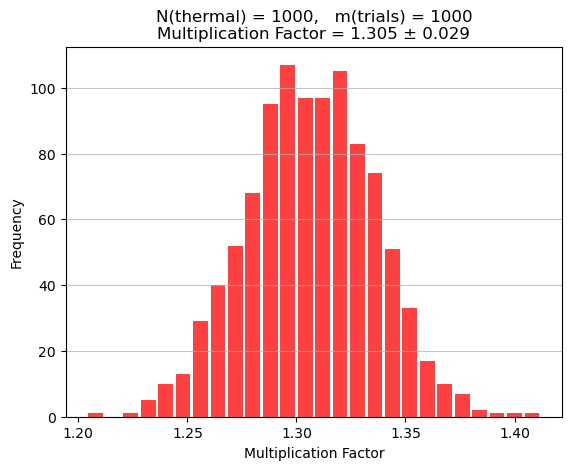

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

#N = initial number of thermal neutron
def find_factor(N):
    
    #Length of cube's sides
    r=0.50 #m
    
    #Mean free path based on the cross section in U235
    mean_free_path=0.15 #m
    
    #Probability of an absorbed neutron resulting in fission
    p=1.0
    
    #Average number of thermal neutrons
    N_thermal_avg=2.435
    
    #Randomize initial directions for each neutron
    phi= 2*np.pi*(np.random.random(N)-0.5)
    cos=2*(np.random.random(N)-0.5)
    theta=np.arccos(cos)
    
    #Randomize initial starting position for decaying neutrons
    x0=r*(np.random.random(N)-0.5)
    y0=r*(np.random.random(N)-0.5)
    z0=r*(np.random.random(N)-0.5)
    
    #generate random distance travelled
    d= -mean_free_path*np.log(np.random.random(N))
    
    #Final positions
    xf = x0 + d*np.sin(theta)*np.cos(phi)
    yf = y0 + d*np.sin(theta)*np.sin(phi)
    zf = z0 + d*cos
    
    #Number of decayed that stay in the Uranium
    x_in=np.abs(xf) < r/2
    y_in=np.abs(yf) < r/2
    z_in=np.abs(zf) < r/2
    xyz_in=np.logical_and(z_in, np.logical_and(x_in, y_in))
    
    #Total number of absorbed 
    N_absorbed=xyz_in.sum()
    
    N_fissions=sum(np.random.random(N_absorbed)<p)
    
    N_new = 2*N_fissions
    
    return N_new/N

def many_factors(N, m_trials):
    
    f=np.zeros(m_trials)
    for i in range(len(f)):
        f[i] = find_factor(N)
        
    f_mean=f.mean()
    f_std=f.std(ddof=1)
    
    return f, f_mean, f_std

def result_histogram(f, f_mean, f_std):
    
    plt.hist(f, bins='auto', color='red', alpha=0.75, rwidth=0.85)
    plt.xlabel('Multiplication Factor')
    plt.ylabel('Frequency')
    plt.title(f"N(thermal) = 1000,   m(trials) = 1000\nMultiplication Factor = {f_mean:.3f} ± {f_std:.3f}")
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    
N=1000
m_trials=1000

f, f_mean, f_std= many_factors(N, m_trials)

result_histogram(f, f_mean, f_std)


### Characterizing Uncertainty

In [27]:
# Characterize Uncertainty
N = 1000  # Initial number of thermal neutrons
m_trials = 1000  # Number of trials to run

f, f_mean, f_std = many_factors(N, m_trials)

print(f"Mean Multiplication Factor: {f_mean:.3f}")
print(f"Standard Deviation: {f_std:.3f}")

Mean Multiplication Factor: 1.305
Standard Deviation: 0.029


### Investigating the Impact of Parameters

In [ ]:
# Investigate the Impact of Parameters
N_values = [500, 1000, 2000, 3000, 4000]  # Test different values for N
m_trials_values = [500, 1000, 2000, 3000, 4000]  # Test different values for m_trials

for N_value in N_values:
    for m_trials_value in m_trials_values:
        f, f_mean, f_std = many_factors(N_value, m_trials_value)
        print(f"N={N_value}, m_trials={m_trials_value}")
        print(f"Mean Multiplication Factor: {f_mean:.3f}")
        print(f"Standard Deviation: {f_std:.3f}")
        print()

### Results of Brief Parameter Investigation

By looking through each iteration of for_loop above we can see that as N, Initial number of thermal neutrons, increases the standard deviation significantly decreases. While as the total number of trials increases there is not any real difference between m_trials=1000 and m_trials=4000

# Background and Motivation
_(Provide some context for the problem and the specific reasearch question(s) you set out to answer. Make sure to discuss why your specific research question(s) would be interesting to investigate. Make sure to explicitly state which parameters you are changing and which paremeters you are keeping fixed. This is also the appropriate place to communicate your governing equations and introduce any additional equations that you might use to check the results of your code. Note: It is helpful for the graders if you are able to embed equations and calculations in the markdown or as images in the notebook instead of as additional files.)_

initially I didn't have too much of a direction on where I wanted to take this project. There were so many different options and with having a previous interest in nuclear physics I wanted to try and choose an idea I knew I would find interesting. Then I noticed the idea of neutron moderators, purity, and multiplication factor and having heard of them previously, I decided to look into the idea of it further.

Neutron moderators play a crucial role in nuclear power plants by slowing down fast neutrons produced during nuclear fission reactions. In a nuclear reactor, the fission process involves the splitting of atomic nuclei, in this case uranium-235. When a neutron collides with a fissile nucleus, it causes the nucleus to split releasing large amounts of energy as well as additional neutrons. Neutron moderators are materials with low atomic mass that efficiently slow down fast neutrons through collisions, making thme more likely to induce fission in other fissile nuclei.

Having a pure sample is crucial for achieving and sustaining desirable conditions in a nuclear reactor.  If fuel contains a significant amount of non-fissile isotopes (e.g. uranium-238), it can reduce the overall reactivity and efficiency of a reactor. Furthermore, the uniformity in the distribution of the fissile material throughout the fuel assembly is extremely important. Variations in fuel composition can lead to an uneven neutron flux, hotspots, as well as localized reactivity. All of these irregularities can impact the stability and safety of a reactor, with the potential of causing temperature fluctuations and structural stress.

The multiplication factor is a measure of the state of a nuclear reactor, representing the ratio of the average number of neutrons in one generation to the average number of neutrons in the preceding generation. In a stable reactor, the multiplication factor is equal to 1.0, meaning that the number of neutrons produced in each fission event is sufficient to continuously sustain a chain reaction. Furthermore, if the multiplication factor is greater than 1.0, it indicates a supercritical condition; while, if the multiplication factor is less than 1.0, it indicates a subcritical condition.


**This leads to this project's purpose:** What is the relationship between a the neutron moderator and the purity of a sample? Furthermore, what are the ideal conditions of the neutron moderator and purity of a sample leading to a fully stable reactor? 

I will be investigating the parameters of mean free path as a way of representing the neutron moderator, and the probability of an absorbed neutron resulting in fission representing the purity of sample. The only other condition that will be changed is the length of the cube's sides, going from 0.5m to 1.5m.

# Methodology and computational code:
_(How did you go about answering your questions(s)?  In 3-5 sentences, provide an overview of how your code below solves the problem. Additionally, include brief descriptions of any python packages you used beyond from the standard ones (i.e., those other than NumPy, Matplotlib or SciPy). You should also add citations for any of these in the references section.)_

I want to present the relationship between mean free path (MFP), purity, and the multiplication factor (f factor) data by uniformly randomizing the MFP and purity over a set range of (0-5) and (0-1). I am doing this as I want to see the relationship between these two factors; while doing this I will also set the other factors to be constant with the only deviation from the original code being that the box's sides are now 1.5m. First, I am going to make a 3D grid of the MFP and purity as the xy axis and the resulting f factor as the z axis. Next to this as a subplot I will also add a 2D contour plot showing an overhead view of how the f factor changes. As I would like to take data points and not simply look at a visual, I also want to make an interactive 2D contour plot making it much easier to test if my code is performing properly through error testing. As a subplot to this, I will put in a histogram showing the number of results that are within a certain amount from differing f factors, although not too informative it is a good visual to show the likeliness of an f factor being found. Finally, I want to overlay many seperate histograms representing MFP and Purity combinations with a f factor within 0.01 of 1.0 in order to see the distribution and if there is any important information to be found.

I used the standard python packages of NumPy, Matplotlib, and SciPy as well as Axes3D from an extension of mp_toolkitsimport. I also used plotly.express as px and plotly.graph_objects as go in order to create an interactive 2D contour plot displaying the conditions and results for each point.

_(Below is the part of your notebook that should include the majority of your code.  Don’t put plots here, though, as they belong in the Data Vizualization section.)_


In [1]:
pip install numpy plotly scipy

Note: you may need to restart the kernel to use updated packages.


### 3D mesh plot // 2D contour plot 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

def find_factor(N, mean_free_path, p, r=1.50):
    phi = 2 * np.pi * (np.random.random(N) - 0.5)
    cos = 2 * (np.random.random(N) - 0.5)
    theta = np.arccos(cos)

    x0 = r * (np.random.random(N) - 0.5)
    y0 = r * (np.random.random(N) - 0.5)
    z0 = r * (np.random.random(N) - 0.5)

    d = -mean_free_path * np.log(np.random.random(N))

    xf = x0 + d * np.sin(theta) * np.cos(phi)
    yf = y0 + d * np.sin(theta) * np.sin(phi)
    zf = z0 + d * cos

    x_in = np.abs(xf) < r / 2
    y_in = np.abs(yf) < r / 2
    z_in = np.abs(zf) < r / 2
    xyz_in = np.logical_and(z_in, np.logical_and(x_in, y_in))

    N_absorbed = xyz_in.sum()

    N_fissions = sum(np.random.random(N_absorbed) < p)
    N_new = 2 * N_fissions

    return N_new / N

def simulate_for_parameters1(N, m_paths, m_probs, m_trials):
    path_values = np.linspace(0.01, 5, m_paths)
    prob_values = np.linspace(0.01, 1, m_probs)
    results = []

    for path in path_values:
        for prob in prob_values:
            multiplication_factors = np.zeros(m_trials)
            
            for i in range(m_trials):
                multiplication_factors[i] = find_factor(N, path, prob)
                
            mean_factor = multiplication_factors.mean()
            std_factor = multiplication_factors.std(ddof=1)
            results.append((path, prob, mean_factor, std_factor))

    return results

def plot_results1(results):
    fig = plt.figure(figsize=(16, 8))
    
    ax1 = fig.add_subplot(121, projection='3d')
    path_values, prob_values, mean_factors, _ = zip(*results)
    surf = ax1.plot_trisurf(path_values, prob_values, mean_factors, cmap='magma')
    ax1.set_xlabel('Mean Free Path')
    ax1.set_ylabel('Probability')
    ax1.set_zlabel('F Factor')
    ax1.set_title(f"N(thermal) = 1000, m(trials) = 1000 - 3D Plot")
    
    ax2 = fig.add_subplot(122)
    contour = ax2.tricontourf(path_values, prob_values, mean_factors, cmap='magma')
    ax2.set_xlabel('Mean Free Path')
    ax2.set_ylabel('Probability')
    ax2.set_title(f"N(thermal) = 1000, m(trials) = 1000 - 2D Contour Plot")
    
    # Add color bar to the right of the 2D contour plot
    cbar = plt.colorbar(contour, ax=ax2, label='F Factor')
    
    plt.tight_layout(pad=6.0)  # Adjust pad to control the spacing
    plt.show()

### Overlaid Histograms

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def find_factor(N, mean_free_path, p):
    r = 1.50  # Length of cube's sides
    N_thermal_avg = 2.435  # Average number of thermal neutrons

    phi = 2 * np.pi * (np.random.random(N) - 0.5)
    cos = 2 * (np.random.random(N) - 0.5)
    theta = np.arccos(cos)

    x0 = r * (np.random.random(N) - 0.5)
    y0 = r * (np.random.random(N) - 0.5)
    z0 = r * (np.random.random(N) - 0.5)

    d = -mean_free_path * np.log(np.random.random(N))

    xf = x0 + d * np.sin(theta) * np.cos(phi)
    yf = y0 + d * np.sin(theta) * np.sin(phi)
    zf = z0 + d * cos

    x_in = np.abs(xf) < r / 2
    y_in = np.abs(yf) < r / 2
    z_in = np.abs(zf) < r / 2
    xyz_in = np.logical_and(z_in, np.logical_and(x_in, y_in))

    N_absorbed = xyz_in.sum()

    N_fissions = sum(np.random.random(N_absorbed) < p)
    N_new = 2 * N_fissions

    return N_new / N

def many_factors(N, mean_free_path, p, m_trials):
    f = np.zeros(m_trials)
    for i in range(len(f)):
        f[i] = find_factor(N, mean_free_path, p)

    f_mean = f.mean()
    f_std = f.std(ddof=1)

    return f, f_mean, f_std

def simulate_for_parameters2(N, m_paths, m_probs, m_trials, target_factor=1.0, factor_tolerance=0.01):
    path_values = np.linspace(0.01, 5, m_paths)
    prob_values = np.linspace(0.01, 1, m_probs)
    results = []

    for path in path_values:
        for prob in prob_values:
            multiplication_factors = np.zeros(m_trials)

            for i in range(m_trials):
                multiplication_factors[i] = find_factor(N, path, prob)

            mean_factor = multiplication_factors.mean()

            if abs(mean_factor - target_factor) < factor_tolerance:
                std_factor = multiplication_factors.std(ddof=1)
                results.append((path, prob, multiplication_factors, mean_factor, std_factor))

    return results

def plot_results2(results):
    fig, ax = plt.subplots(figsize=(12, 8))

    
    cmap = cm.get_cmap('magma')
    norm = plt.Normalize(min(result[0] for result in results), max(result[0] for result in results))
    scalar_map = cm.ScalarMappable(norm=norm, cmap=cmap)

    for result in results:
        path, prob, factors, mean_factor, std_factor = result
        color = scalar_map.to_rgba(path)
        hist, bins, _ = plt.hist(factors, bins=20, alpha=0.75, label=f'Mean Free Path={path:.2f}, Probability={prob:.2f}', color=color)

    # Add colorbar
    cbar = plt.colorbar(scalar_map, ax=ax, label='Mean Free Path')

    # Move the legend to the upper left corner
    plt.legend(loc='upper left')

    plt.xlabel('Multiplication Factor')
    plt.ylabel('Frequency')
    plt.title(f"N(thermal) = 1000, m(trials) = 1000")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

### Interactive 2D Contour Plot

In [4]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import curve_fit

def find_factor(N, mean_free_path, p, r=1.50):
    phi = 2 * np.pi * (np.random.random(N) - 0.5)
    cos = 2 * (np.random.random(N) - 0.5)
    theta = np.arccos(cos)

    x0 = r * (np.random.random(N) - 0.5)
    y0 = r * (np.random.random(N) - 0.5)
    z0 = r * (np.random.random(N) - 0.5)

    d = -mean_free_path * np.log(np.random.random(N))

    xf = x0 + d * np.sin(theta) * np.cos(phi)
    yf = y0 + d * np.sin(theta) * np.sin(phi)
    zf = z0 + d * cos

    x_in = np.abs(xf) < r / 2
    y_in = np.abs(yf) < r / 2
    z_in = np.abs(zf) < r / 2
    xyz_in = np.logical_and(z_in, np.logical_and(x_in, y_in))

    N_absorbed = xyz_in.sum()

    N_fissions = sum(np.random.random(N_absorbed) < p)
    N_new = 2 * N_fissions

    return N_new / N

def simulate_for_parameters3(N, m_paths, m_probs, m_trials):
    path_values = np.linspace(0.01, 5, m_paths)
    prob_values = np.linspace(0.01, 1, m_probs)
    results = []

    for path in path_values:
        for prob in prob_values:
            multiplication_factors = np.zeros(m_trials)
            
            for i in range(m_trials):
                multiplication_factors[i] = find_factor(N, path, prob)
                
            mean_factor = multiplication_factors.mean()
            std_factor = multiplication_factors.std(ddof=1)
            results.append((path, prob, mean_factor, std_factor))

    return results

### Subplots of Materials

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def find_factor(N, mean_free_path, p, r=1.50):
    phi = 2 * np.pi * (np.random.random(N) - 0.5)
    cos = 2 * (np.random.random(N) - 0.5)
    theta = np.arccos(cos)

    x0 = r * (np.random.random(N) - 0.5)
    y0 = r * (np.random.random(N) - 0.5)
    z0 = r * (np.random.random(N) - 0.5)

    d = -mean_free_path * np.log(np.random.random(N))

    xf = x0 + d * np.sin(theta) * np.cos(phi)
    yf = y0 + d * np.sin(theta) * np.sin(phi)
    zf = z0 + d * cos

    x_in = np.abs(xf) < r / 2
    y_in = np.abs(yf) < r / 2
    z_in = np.abs(zf) < r / 2
    xyz_in = np.logical_and(z_in, np.logical_and(x_in, y_in))

    N_absorbed = xyz_in.sum()

    N_fissions = sum(np.random.random(N_absorbed) < p)
    N_new = 2 * N_fissions

    return N_new / N

def many_factors(N, m_trials, find_factor_func, **params):
    f = np.zeros(m_trials)
    for i in range(len(f)):
        f[i] = find_factor_func(N, **params)
    f_mean = f.mean()
    f_std = f.std(ddof=1)
    return f, f_mean, f_std

def result_histogram(ax, f, f_mean, f_std, material_name):
    ax.hist(f, bins='auto', color='red', alpha=0.75, rwidth=0.85)
    ax.set_xlabel('Multiplication Factor')
    ax.set_ylabel('Frequency')
    ax.set_title(f"{material_name}\nMultiplication Factor = {f_mean:.3f} ± {f_std:.3f}")
    ax.grid(axis='y', alpha=0.75)
    ax.text(0.05, 0.9, f"F Factor = {f_mean:.3f} ± {f_std:.3f}", transform=ax.transAxes, fontsize=10, verticalalignment='top')

def plot_subplots_MFP(materials):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs = axs.flatten()

    for ax, (material_name, params) in zip(axs, materials):
        f, f_mean, f_std = many_factors(N, m_trials, find_factor, **params)
        result_histogram(ax, f, f_mean, f_std, material_name)
        ax.set_title(material_name)

    plt.tight_layout()
    plt.show()


# Error testing

_(Convince yourself that your system, from a physics and a coding perspective, is behaving correctly and provide your most compelling evidence here. This may include calculations, notes, common-sense checking of the input and output from your code, or running the code with specific parameters to make sure everything behaves how you expect. It may also include visualizations whose purpose is strictly related to error checking. Use as many code and markdown cells as you need. Note: It is helpful for the graders if you are able to embed equations and calculations in the markdown or as images in the notebook instead of as additional files.)_

In order to error test my code, I will be referring to the interactive contour plot from above. I will be taking the initial mean free paths and probabilities leading to a multiplication factor of 1 (within 0.05) and testing them with the code seen above

All values taken from interactive contour plot

mean path= 0.01 probability= 0.515102 f factor=1.01616 

mean path= 0.1118367 Probabilty= 0.5555102 f factor= 0.9907199999999

mean path= 0.2136735 Probability= 0.6161224 f factor= 0.994019999999

mean path= 0.31552012 Probability= 0.6969388 f factor= 1.028560000001

mean path=0.6210204 Probability= 0.8787755 f factor = 1.00162

mean path= 0.7228571 Probability=0.9595918 f factor = 1.0031

In [3]:
# Your error checking code, function calls and plotting code. Add more code cells as needed.
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def find_factor(N, mean_free_path, p, r=1.50):
    phi = 2 * np.pi * (np.random.random(N) - 0.5)
    cos = 2 * (np.random.random(N) - 0.5)
    theta = np.arccos(cos)

    x0 = r * (np.random.random(N) - 0.5)
    y0 = r * (np.random.random(N) - 0.5)
    z0 = r * (np.random.random(N) - 0.5)

    d = -mean_free_path * np.log(np.random.random(N))

    xf = x0 + d * np.sin(theta) * np.cos(phi)
    yf = y0 + d * np.sin(theta) * np.sin(phi)
    zf = z0 + d * cos

    x_in = np.abs(xf) < r / 2
    y_in = np.abs(yf) < r / 2
    z_in = np.abs(zf) < r / 2
    xyz_in = np.logical_and(z_in, np.logical_and(x_in, y_in))

    N_absorbed = xyz_in.sum()

    N_fissions = sum(np.random.random(N_absorbed) < p)
    N_new = 2 * N_fissions

    return N_new / N

def many_factors(N, m_trials, find_factor_func, **params):
    f = np.zeros(m_trials)
    for i in range(len(f)):
        f[i] = find_factor_func(N, **params)
    f_mean = f.mean()
    f_std = f.std(ddof=1)
    return f, f_mean, f_std

def result_histogram(ax, f, f_mean, f_std, material_name):
    ax.hist(f, bins='auto', color='red', alpha=0.75, rwidth=0.85)
    ax.set_xlabel('Multiplication Factor')
    ax.set_ylabel('Frequency')
    ax.set_title(f"{material_name}\nMultiplication Factor = {f_mean:.3f} ± {f_std:.3f}")
    ax.grid(axis='y', alpha=0.75)
    ax.text(0.05, 0.9, f"F Factor = {f_mean:.3f} ± {f_std:.3f}", transform=ax.transAxes, fontsize=10, verticalalignment='top')

def plot_subplots(materials):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs = axs.flatten()

    for ax, (material_name, params) in zip(axs, materials):
        f, f_mean, f_std = many_factors(N, m_trials, find_factor, **params)
        result_histogram(ax, f, f_mean, f_std, material_name)
        ax.set_title(material_name)

    plt.tight_layout()
    plt.show()


# Data visualization, interpretation and presentation of results
_(This section should include code that produces your visualizations and any other aspects of your data or results that you would like to present. Make sure to provide caption-style summaries with everything presented in this section so that the reader can understand and correctly interpret your visualizations and presented results.)_

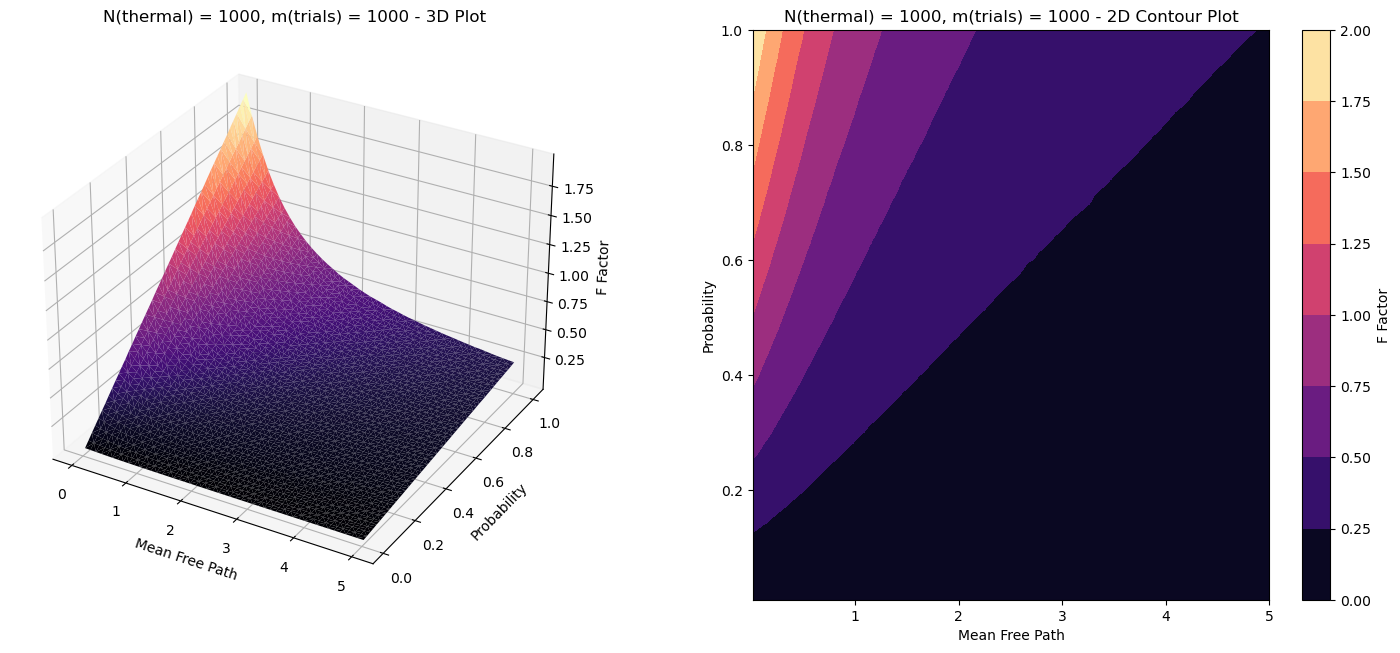

In [7]:
# Set your parameters
N = 1000
m_paths = 50
m_probs = 50
m_trials = 1000

# Run simulation and plot results
results = simulate_for_parameters1(N, m_paths, m_probs, m_trials)
plot_results1(results)

The above visualization is a 3D visualization of how the multiplication factor is effected. I think I should put the contour plot next to it so that they're subplots. Then I can place the interactive 2D contour plot directly underneath

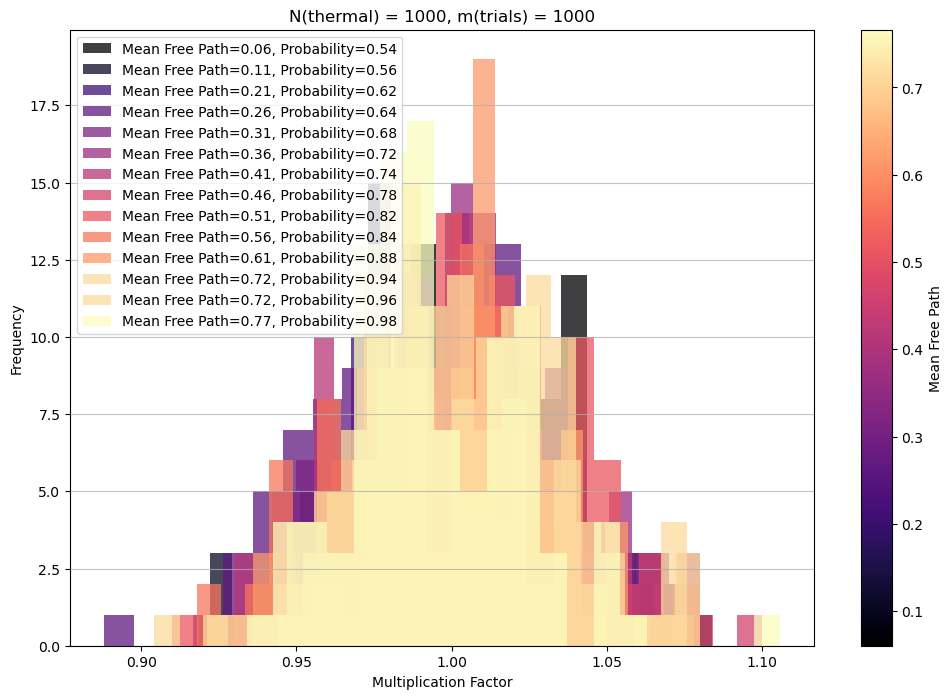

In [14]:
N = 1000
m_paths = 100
m_probs = 50
m_trials = 100

target_factor = 1.0
factor_tolerance = 0.01

results = simulate_for_parameters2(N, m_paths, m_probs, m_trials, target_factor, factor_tolerance)
plot_results2(results)

The above visualization displays  It shows the histograms of the mean free paths and probabilities that result in multiplication factors within 0.01 of a targeted multiplication factor of 1.0



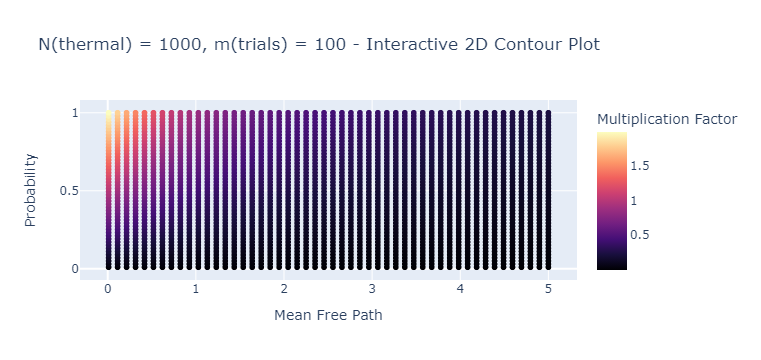

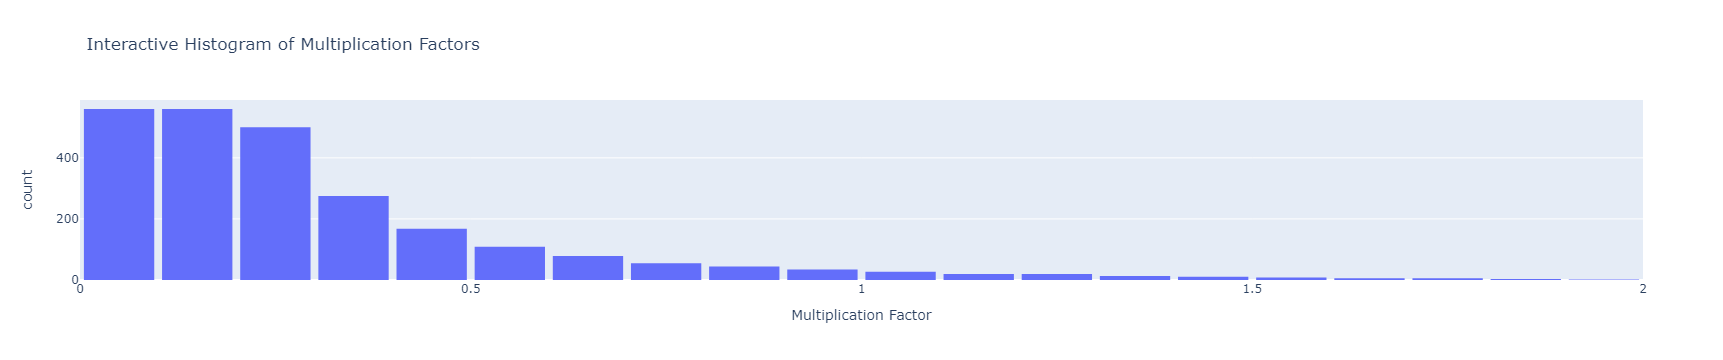

In [9]:
N = 1000
m_trials = 100
m_paths = 50
m_probs = 50


# Run the simulation
results = simulate_for_parameters3(N, m_paths, m_probs, m_trials)

# Extract data for the 2D contour plot
path_values, prob_values, mean_factors, _ = zip(*results)

# Create an interactive 2D contour plot using Plotly Express
fig_contour = px.scatter(x=path_values, y=prob_values, color=mean_factors,
                         labels={'x': 'Mean Free Path', 'y': 'Probability', 'color': 'Multiplication Factor'},
                         title=f"N(thermal) = {N}, m(trials) = {m_trials} - Interactive 2D Contour Plot",
                         color_continuous_scale='magma')
fig_contour.update_traces(marker=dict(size=6))
fig_contour.show()

# Extract multiplication factors for the histogram
multiplication_factors = [result[2] for result in results]

# Create an interactive histogram using Plotly
fig_histogram = px.histogram(x=multiplication_factors, nbins=20,
                             labels={'x': 'Multiplication Factor'},
                             title='Interactive Histogram of Multiplication Factors')
fig_histogram.update_layout(bargap=0.1)  # Adjust the gap between bars
fig_histogram.show()

The above visualization further shows the relationship between the mean free path and the probability in order to achieve a multiplication factor as close to 1.0 as possible. The histogram below shows the frequency of multiplication factors ranging from 0 to 2 based on the randomized ranges used throughout the project.

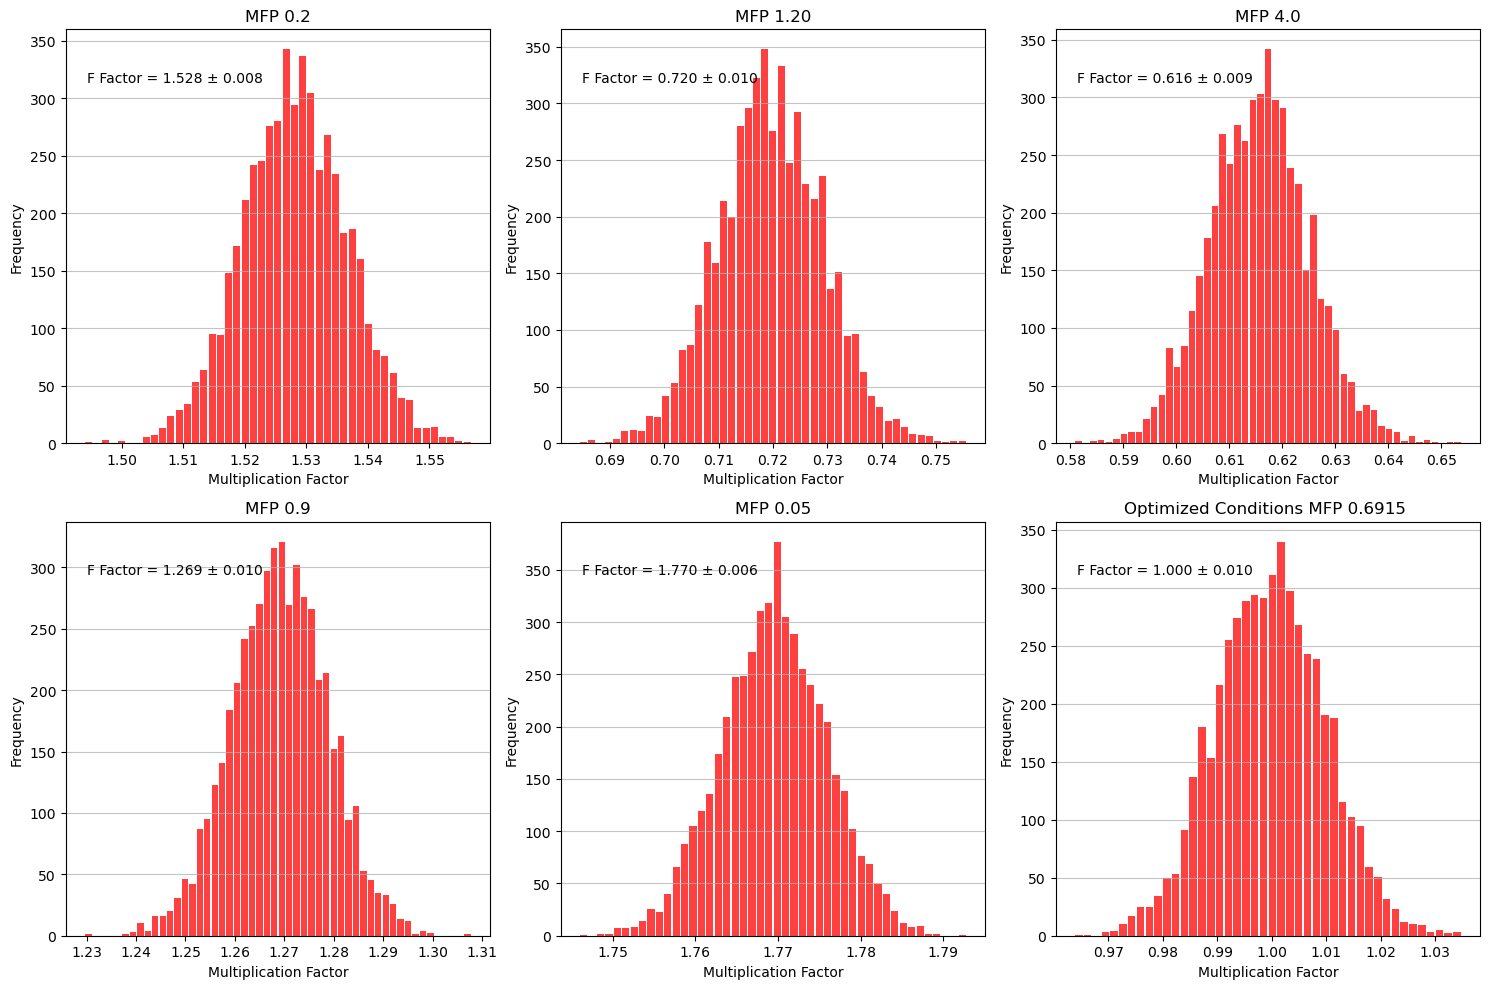

In [10]:
N = 10000
m_trials = 5000

materials = [
    ("MFP 0.2", {'mean_free_path': 0.2, 'p': 0.93}),
    ("MFP 1.20", {'mean_free_path': 1.20, 'p': 0.93}),
    ("MFP 4.0", {'mean_free_path': 1.50, 'p': 0.93}),
    ("MFP 0.9", {'mean_free_path': 0.4, 'p': 0.93}),
    ("MFP 0.05", {'mean_free_path': 0.05, 'p': 0.93}),
    ("Optimized Conditions MFP 0.6915 ", {'mean_free_path':0.6915, 'p': 0.93})
]

plot_subplots_MFP(materials)

The above visualization serves as an example to show differences between effective and ineffective conditions for stable fission reactions. 

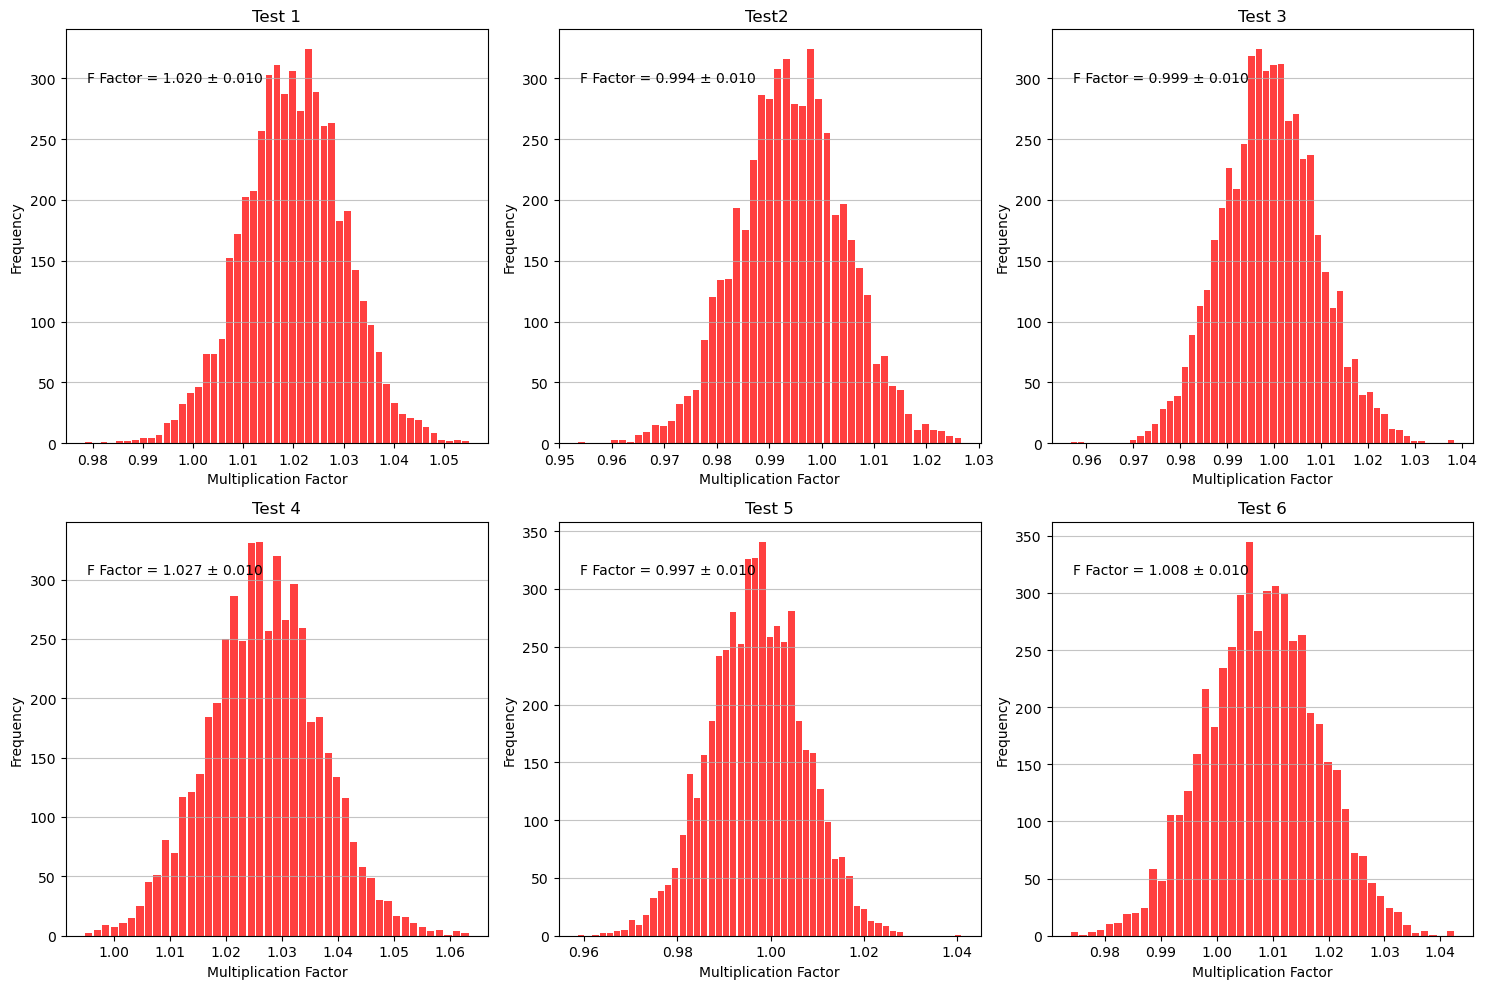

In [8]:
N = 10000
m_trials = 5000

materials = [
    ("Test 1", {'mean_free_path': 0.01, 'p':  0.515102}),
    ("Test2 ", {'mean_free_path': 0.1118367, 'p': 0.5555102}),
    ("Test 3", {'mean_free_path': 0.2136735, 'p': 0.6161224}),
    ("Test 4", {'mean_free_path': 0.31552012, 'p': 0.6969388}),
    ("Test 5", {'mean_free_path': 0.6210204, 'p': 0.8787755}),
    ("Test 6", {'mean_free_path': 0.7228571, 'p': 0.9595918})
]

plot_subplots(materials)

The above visualization shows the error testing approach used to ensure the code is running as expected. The points above were taken using the Interactive 2D contour plot. As the multiplication factors here match the factors calculated in the contour plot we are able to test it's reliability.

# Synthesis and discussion
_(Use your results to dicuss the answer(s) to your research question(s). Make sure to provide quantitative answers to your questions and justify your conclusions based on information presented in the previous section. You should also discuss the limitations of your investigations, of your physical modelling and of your code, as well as the next steps if you were to continue working on this project.)_

#### Introduction 

The purpose of this project was to answer the following questions: what is the relationship between a the neutron moderator (Mean free path) and the purity (probability) of a sample? Furthermore, what are the ideal conditions of the neutron moderator and purity of a sample leading to a fully stable reactor (f factor=1.0)? These questions proved to be challenging to answer and yielded very interesting results.

#### Challenges Faced//Methodology

Initially, I didn't really have much of a direction as to how I should begin my investigation onto the parameters I had chosen. So, taking a shot In the dark I decided to vary the mean free path (MFP) with a set probability value graphing the MFP vs the f factor. Afterwards I also decided to do the same with a varying probability and set MFP.  The results of these were not particularly interesting or insightful. However, I then got the idea to vary both the MFP and probability over a set range to see how they both relate to the resulting f factor. This proved far more useful and was able to far more effectively show the relationship between the two factors on the output. Once I got this graph to work, I noticed that it was good at visually showing the change in the f factor by slope; however, it still proved difficult to read which is why I decided to use what I had learned to from this course to create a 2D contour plot of the same graph. 

Continuing on, I wanted to have a way to take points more accurately and precisely as I could only do so by eye-balling the conditions from the first graphs I had created. This is when I got inspiration from my friend Sidney Shapiro on what he had previously done in a past project using a pandas import to create a scatter plot of points with the ability to read the corresponding conditions for each point. However, instead of using the method he used, I was able to continue using MatPlotLib and a matplotlib.3D library as I found it easier to comprehend. Although extremely challenging, I was able to create the plot I was looking for with the added benefit of showing frequency of how often low and high f factors were calculated. This graph was particularly useful for error testing as I was able to take the MFP and Probability that was displayed, and by using a similar code to that of task 1 was able to input them and if the f factor was within a standard deviation from what was calculated we could see that the code was working as expected.

Finally, after showing my father my project I was further inspired to overlay several histograms with an f factor within 0.01 of 1.0 in order to see the standard distribution, peak, and any outliers. This could be helpful for finding conditions that lead to unexpected behaviour, skewness in distribution behaviour, and many other important pieces of information.

#### Results

By qualitatively looking at the 3D graph and its contour plot, we can already see the relationship between MFP and Probability as well as their affects on the f factor. Higher purity samples imply having a greater concentration of fissile material relative to non-fissile material. This higher concentration of fissile material is able to lead to far more opportunities for neutron interactions and fission reactions. By viewing the 2D contour plot we are able to see that if the sample is completely pure (has a value of 1.0) the resulting multiplication factor will be at a maximum for the moderator it is placed in.  Leading to the second point on the mean free path; a shorter MFP means that neutrons are more likely to interact with fissile nuclei, increasing the amount of fission reactions. Therefore, qualitatively and quantitatively we are able to see that if you decrease the mean free path to zero, you can expect the multiplication factor to increase. These results follow expectation and we are able to conclude the linear relationship between the mean free path and probability. Furthermore, we can also deduce the importance of a neutron moderator and the purity of a sample in the interactive histogram of multiplication factors as this shows how if either one of these factors is not above a specific threshold the chance of having an effective multiplication factor exponentially decreases.

To define a stable condition, this was set to be when the multiplication factor is essentially 1.0 +/- around 0.05. This is important as if the f factor were below 1.0 it would result in a subcritical reaction while if it were above 1.0 it would result in a supercritical reaction. Now that our stability condition has been defined by looking at the interactive 2D contour plot we are able to see that starting at around (MFP=0.0, Prob=0.515) we can see that this is where an ideally stable condition begins, this linearly extends up to the maximum probability at the point (MFP=0.8247, Prob=1.0). This is able to highlight the important of sample purity in trying to achieve and maintain stability. The linear trend indicates that as the mean free path increases, so does the probability, reinforcing the idea that a balance between these two factors is crucial for sustaining a stable reaction.  

Continuing the investigation of both of these questions, the final visualization to unpack is the overlaid histograms. Beginning with expected traits, it can be seen that the central tendency seems to be consistently at 1.0 as this indicates where the most frequently occurring multiplication factors are located. The dispersion of the distribution also seems to appear consistent, excluding noticeable outliers, once again matching expectation. Continuing the analysis, qualitatively assessing the histograms we can see a slight right skew to the distribution having a longer tail on that side. This can be explained by the enclosed space of our cube and the travel distance of the neutrons with the cube having a side length of 1.5m and a total range from 0-5m in mean free path. A higher mean free path implies that, on average, neutrons can travel longer distances within the cube before interacting with other particles. If the mean free path longer than the length of the cube, there is an increased likelihood that neutrons may reach the boundaries of the system and escape. The three factors of longer mean free path, escape probability, and decreased interaction probability may all contribute to this slight skew. As a note, this skew may also simply be coming from the simulate_for_parameters function as the code selects simulations that closely match the targeted multiplication factor, and if these happen to all be slightly above the stability threshold, it could result in a right-skewed distribution.

#### Future Steps

If I were to continue working on this project there would be a few steps I would take in order to improve and investigate further into these conditions. First I would increase the cube side lengths to be longer than the range of the MFPs being used. This will ensure that there are no escaped neutrons that have to be accounted for (as seen in the overlaid histograms) - although it was interesting to try and figure out a reason behind. As a next step I would try and find how the MFP and Probability affect differing shapes in order to not only find the ideal neutron moderator and purity conditions but also ideal shape of the reactive substance. This would delve even further into the idea of stability and finding an even better definition for what it means.

#### Conclusion


In conclusion, this project successfully explored the intricate relationship between the neutron moderator (mean free path) and the purity (probability) of a sample, aiming to identify conditions leading to a fully stable reactor with an f factor of 1.0. The challenges faced during the investigation prompted methodological adaptations, ultimately leading to the creation of 3D graphs, contour plots, and overlaid histograms. Qualitatively and quantitatively analyzing the results revealed a clear linear relationship between mean free path and probability, underscoring the significance of sample purity in achieving and maintaining stability answering the questions posed at the beginning of this project.

# References
_(In addition to citations for any python packages used beyond our standard ones, list the sources for any data or literature cited in your project. Additionally, you must also cite the sources for any code that you found on the internet or from peers.)_

- Chat GPT, chat gpt was able to help me with part of the formatting and debugging of my code when I was faced with unforeseen challenges. 


- Brent Zaparniuk (My Dad), inspired me to overlay several histograms within a given target range in order to find any un-physical or interesting behaviour.


- Sidney Shapiro (peer feedback), Sidney helped me with my project as we frequently worked together on this project and he was able to give me advice from another perspective.


- Chantal Hemmann (peer feedback), Chantal helped me with my project as we frequently worked together on this project and he was able to give me advice from another perspective.


- mpl_toolkits.mplot_3d, https://matplotlib.org/1.3.0/mpl_toolkits/index.html (visualization), this is a simple toolkit from which I used  mplot3d in order to make a 3D subplot of my scatter and line graphs. It is not the fastest 3D library but ships with matplotlib and is a lighter weight solution which was easy to import.

- plotly.express, https://plotly.com/python/plotly-express/ (visualization), this toolkit from plotly was used in order to complete the interactive 2D contour plot in order to better help with the precision and thoroughness of my error testing and quantitative analysis


- plotly.graph_objects, https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html (visualization), this toolkit from plotly was used in order to complete the interactive 2D contour plot in order to better help with the precision and thoroughness of my error testing and quantitative analysis


# Self-evaluations
Please visit the rubric on the Project 03 submission for the detailed criteria to use in your self-assessments.

### *Self-assessment 1: Coding Approaches*
*(How well did you apply and extend your coding knowledge in this project? Consider steps you took to make the code more efficient, more readable and/or more concise. Discuss any new-to-you coding techniques, functions or python packages that you learned how to use. Reflect on any unforeseen coding challenges you faced in completing this project. Highlight something you feel you did particularily well and discuss an aspect of your code that would benefit the most from an improvement.)*

**Self-assessment rating (*Outstanding, Publish, Minor Revisions, Major Revisions, Rework, Absent*):** (Publish)

**Discussion of your coding approaches and justification of your rating:** 

This project is able to demonstrate a strong application as well as extension of my coding knowledge. The use of function names, as well as modular design is able to enhance the readability and also make it more accessible for future modifications. Using libraries such as NumPy, Matplotlib, and Plotly are able to reflect my proficiency in using the existing tools I have available in order to efficiently manipulate data and create visualizations. Furthermore, as I really enjoy 3D coded models, the introduction introduction of 3D plots, contour plots, and overlaid histograms showcases the new approaches for data representation I was able to pursue getting out of my comfort zone in order to do so. Similar to using libraries I am familiar with, I was able to utilize the Monte Carlo simulation throughout this project showing my understanding. 

An area for improvement could involve trying to explore more advanced optimization techniques or other ways to enhance the efficiency of the simulations I am dealing with as they do have a very long run time.

### *Self-assessment 2: Physical modelling and investigation*
*(How well did you apply your and extend your physical modelling and scientific investigation skills in this project? How realistic is the model that you used and why? Consider whether you added more realistic elements to the simulation and how those changed the results. What phase space(s) did you you chose to explore and how throrough was your exploration? Consider how you translated physics into code and if appropriate any new physics you learned or developed a more thorough understanding of. Consider how thorough and compelling your error-testing evidence is in terms of your system functioning correctly. Highlight something you feel you did particularily well and discuss an aspect of your modelling or investigation process that would benefit the most from an improvement.)*

**Self-assessment rating (*Outstanding, Publish, Minor Revisions, Major Revisions, Rework, Absent*):** (Publish)

**Discussion of your physical investigation and justification of your rating:** 

The exploration of the phase space, involving varying mean free path and probability values, is thorough, capturing a broad spectrum of potential scenarios. The error-testing evidence shown in the form of histograms, stability conditions, and comparisons against expected traits is extremely robust and compelling with these measures ensuring the correctness of my simulation. Furthermore, the visualization techniques, including 3D plots and contour plots, contribute to an intuitive representation of the complex relationships within the system, producing a realistic and insightful simulation. .

A potential area for improvement would involve exploring more nuanced factors in neutron behaviour including temperature or material composition variation as this could introduce new physics into the model leading to very interesting results.

### *Self-assessment 3: Effectiveness of your visualizations and fits*
*(How effectively do your visualizations communicate the overall results of your investigations? Consider not only your visualizations section, but also any visualizations you used in error checking and building your confidence that your system is behaving as intended. Were any of your visualizations particularly insightful regarding identifying or resolving unphysical behaviour. Consider the steps you took to maximize how well your visualizations support your ability to answer your research questions. Highlight something you feel you did particularily well and discuss an aspect of your visualizations that would benefit the most from an improvement.)*

**Self-assessment rating (*Outstanding, Publish, Minor Revisions, Major Revisions, Rework, Absent*):** (Outstanding)

**Discussion of your thoroughness of effectiveness of your visualizations and justification of your rating:** 

I am very happy with the results of my visualizations as well as how they are able to effectively and efficiently display my data. The 3D plots and contour plots effectively communicate the relationships between mean free path, probability, and the multiplication factor. These visualizations provide a clear and intuitive understanding of how variations in these parameters impact the stability of the system. Furthermore, the use of overlaid histograms enhances the clarity of identifying stable regions and potential outliers. The color-coded 2D contour plot further aids in visually discerning the stability conditions, further contributing to the overall effectiveness of the visual representation. Although simple, this project is also able to utilize simple histograms for error checking comparing the histogram results with those found in the interactive 2D contour plot validating the accuracy of the data points. These visualizations are able to not only identify any un-physical behaviour but also confidently display the correctness of the simulation. I think that most of the visualizations in this project are it's standout feature, and because of these visualizations the analysis of my chosen phase spaces are far easier to understand.

### *Self-assessment 4: Interpretation of Results*
 *(How accurately and thoroughly did you interpret your results and discuss the key features of your data / results / visualizations? Do your results and discussions answer your research question(s)? Are your limitations and next steps sufficient to provide an accurate picture of your results and actionable next steps?)*

**Self-assessment rating (*Outstanding, Publish, Minor Revisions, Major Revisions, Rework, Absent*):** (Outstanding)

**Discussion of your interpretation of results and justification of your rating:** 

I think that the interpretations of my results are accurate and discuss the key features that my visualizations provide. The accuracy and thoroughness of my interpretation is clearly reflected in my writing on not only my challenges and methodology, but also in my results and changes for the future. I was able to determine the limits of my program and the conditions under which it will work. Thoughts on future plans were also provided which sufficiently states what the next steps I would take in this project would be given more time for research. 